In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import pprint
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.declarative import declarative_base

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
latest_date = session.query(measurement.date).\
    order_by(measurement.date.desc()).first()
print(latest_date)
session.query(measurement.date).order_by(measurement.date.desc()).first()
session.query(func.max(measurement.date)).scalar()

# Calculate the date one year before the last date in data set.
year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_before)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > year_before).\
    order_by(measurement.date).all()

pprint.pprint(scores)


('2017-08-23',)
2016-08-23
[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0

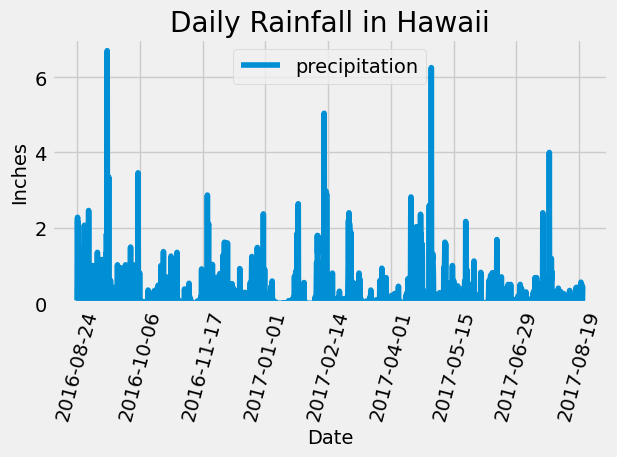

In [11]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names and sort it by date
scores_df = pd.DataFrame(scores, columns=['measurement_date', 'precipitation'])
scores_final_df = scores_df.set_index('measurement_date')
scores_final_df.dropna(axis=0, inplace= True)

# Data sorted in 'scores' query request
scores_final_df.sort_values(by='measurement_date')
scores_final_df


# Use Pandas Plotting with Matplotlib to plot the data
scores_final_df.plot()
plt.title("Daily Rainfall in Hawaii")
plt.ylim(0,7)
plt.xticks(rotation=75)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()


In [12]:
scores_df

,measurement_date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
scores_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.station).count()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(measurement.station,func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).all() 

active_stations

# sel = [measurement.station, 
#        func.count(measurement.station)]
# active_stations = session.query(*sel).\
#         group_by(measurement.station).\
#         order_by(func.count(measurement.station).desc()).all()
# active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#Isolate the most active station
most_active_station = (active_stations[0])
most_active_station

# most_active_station = session.query(measurement.station,func.count(measurement.station)).\
#     order_by(func.count(measurement.station).desc()).\
#     group_by(measurement.station).first()
# Confirm that the most active station was selected:
# print(most_active_station)

print(f" The most active station is: {most_active_station[0]}, with {most_active_station[1]} observations")

# Isolate station ID from this list of station numbers and count of stations
most_active_id = most_active_station[0]
#print(most_active_id) 

# Lowest temperature for most active station
lowest_temperature = session.query(func.min(measurement.tobs)).\
  filter(measurement.station==most_active_id).all()
# print(lowest_temperature) 
print(f"The lowest temperature for the station is {lowest_temperature[0]}")

# Highest temperature for most active station
highest_temperature = session.query(func.max(measurement.tobs)).\
  filter(measurement.station==most_active_id).all()
print(f"The highest temperature for the station is {highest_temperature[0]}")
# print(highest_temperature)

# Avg temperature for most active station
average_temperature = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station==most_active_id).all()
print(f"The average temperature is{average_temperature[0]}")

 The most active station is: USC00519281, with 2772 observations
The lowest temperature for the station is (54.0,)
The highest temperature for the station is (85.0,)
The average temperature is(71.66378066378067,)


(0.0, 70.0)

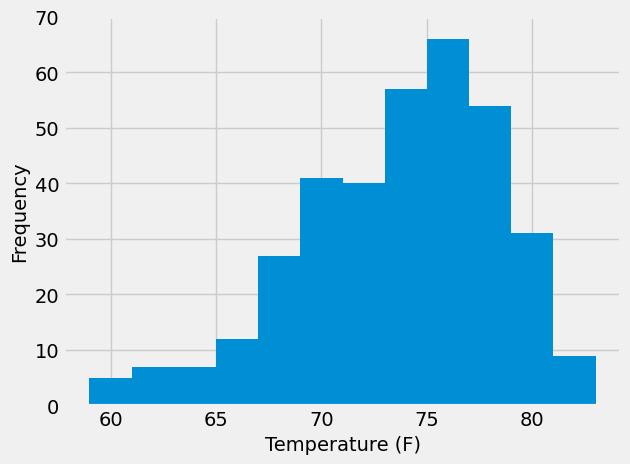

In [17]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
   
    ## Find most recent date for Station: USC00519281 using the most active station ID: 'most_active_id' in order to calculate last 12 months

most_recent_station_date = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_id).\
    order_by(measurement.date.desc()).first()
# print(most_recent_station_date)

# Query shows '2017-08-18' as most recent date for this station, and tobs: 79
# Create query to find dates > 2016-08-18), for our most active station
twelve_month_data = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_id).\
    filter(measurement.date > '2016-08-18').all()

# Check to see if the observation data loads correctly
# for obsdata in twelve_month_data:
#     print(obsdata)

# Plot
# Create series with just tobs from this 12 month period 
station_year_tobs = pd.DataFrame(twelve_month_data)["tobs"]
station_year_tobs 

hist = station_year_tobs.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.ylim(0,70)


# Close Session

In [18]:
# Close Session
session.close()